In [160]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [161]:
data1 = pd.read_csv('water_potability.csv')
data1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [162]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [163]:
duplicate_rows = data1[data1.duplicated()]
print("Data Duplikat:")
print(duplicate_rows)
print("Jumlah Data Duplikat:", len(duplicate_rows))

Data Duplikat:
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Jumlah Data Duplikat: 0


In [164]:
print(data1.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [165]:
mean_ph = data1['ph'].mean()
data1['ph'].fillna(mean_ph, inplace=True)
mean_Sulfate = data1['Sulfate'].mean()
data1['Sulfate'].fillna(mean_Sulfate, inplace=True)
mean_Trihalomethanes = data1['Trihalomethanes'].mean()
data1['Trihalomethanes'].fillna(mean_Trihalomethanes, inplace=True)
print(data1)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [166]:
print(data1.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [167]:
data1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [168]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [169]:
data1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


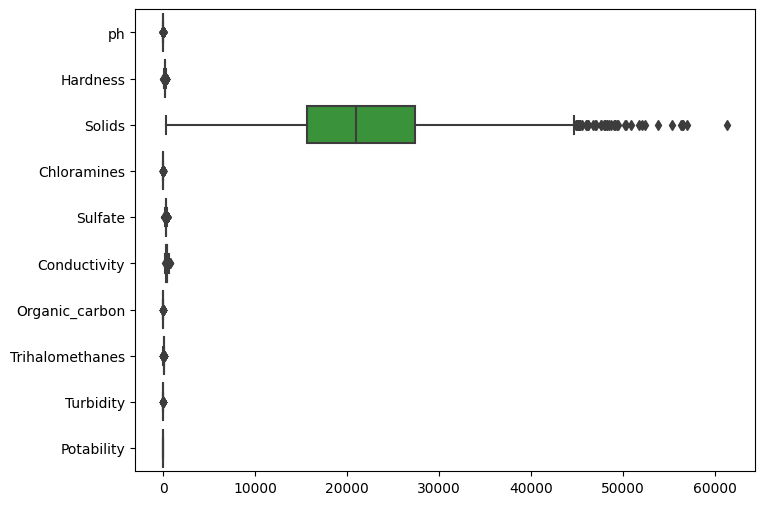

In [170]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data1, orient="h")
plt.show()

In [171]:
# Define a threshold (e.g., 3 standard deviations)
threshold= 3
# Calculate Z-scores for the entire DataFrame
z_scores = stats.zscore(data1)
# Find and remove outliers
outliers = np.abs(z_scores) > threshold
data_clean = data1[~outliers.any(axis=1)]

<Axes: xlabel='Hardness', ylabel='Count'>

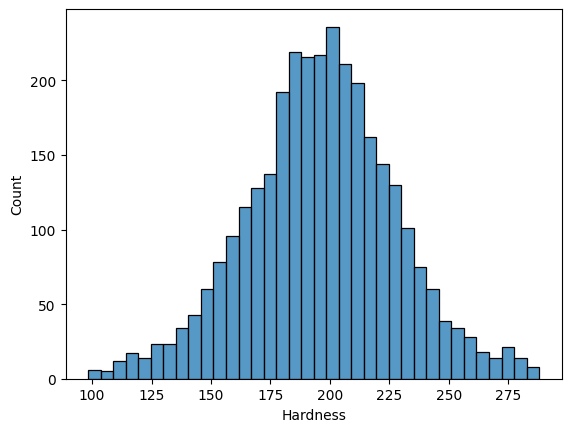

In [172]:
sns.histplot(data_clean['Hardness'])

<Axes: xlabel='ph', ylabel='Count'>

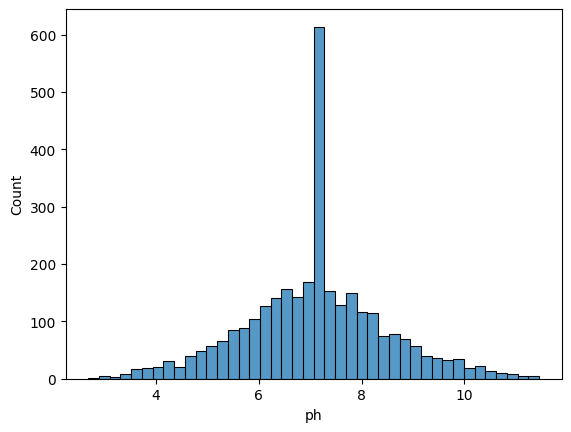

In [173]:
sns.histplot(data_clean['ph'])

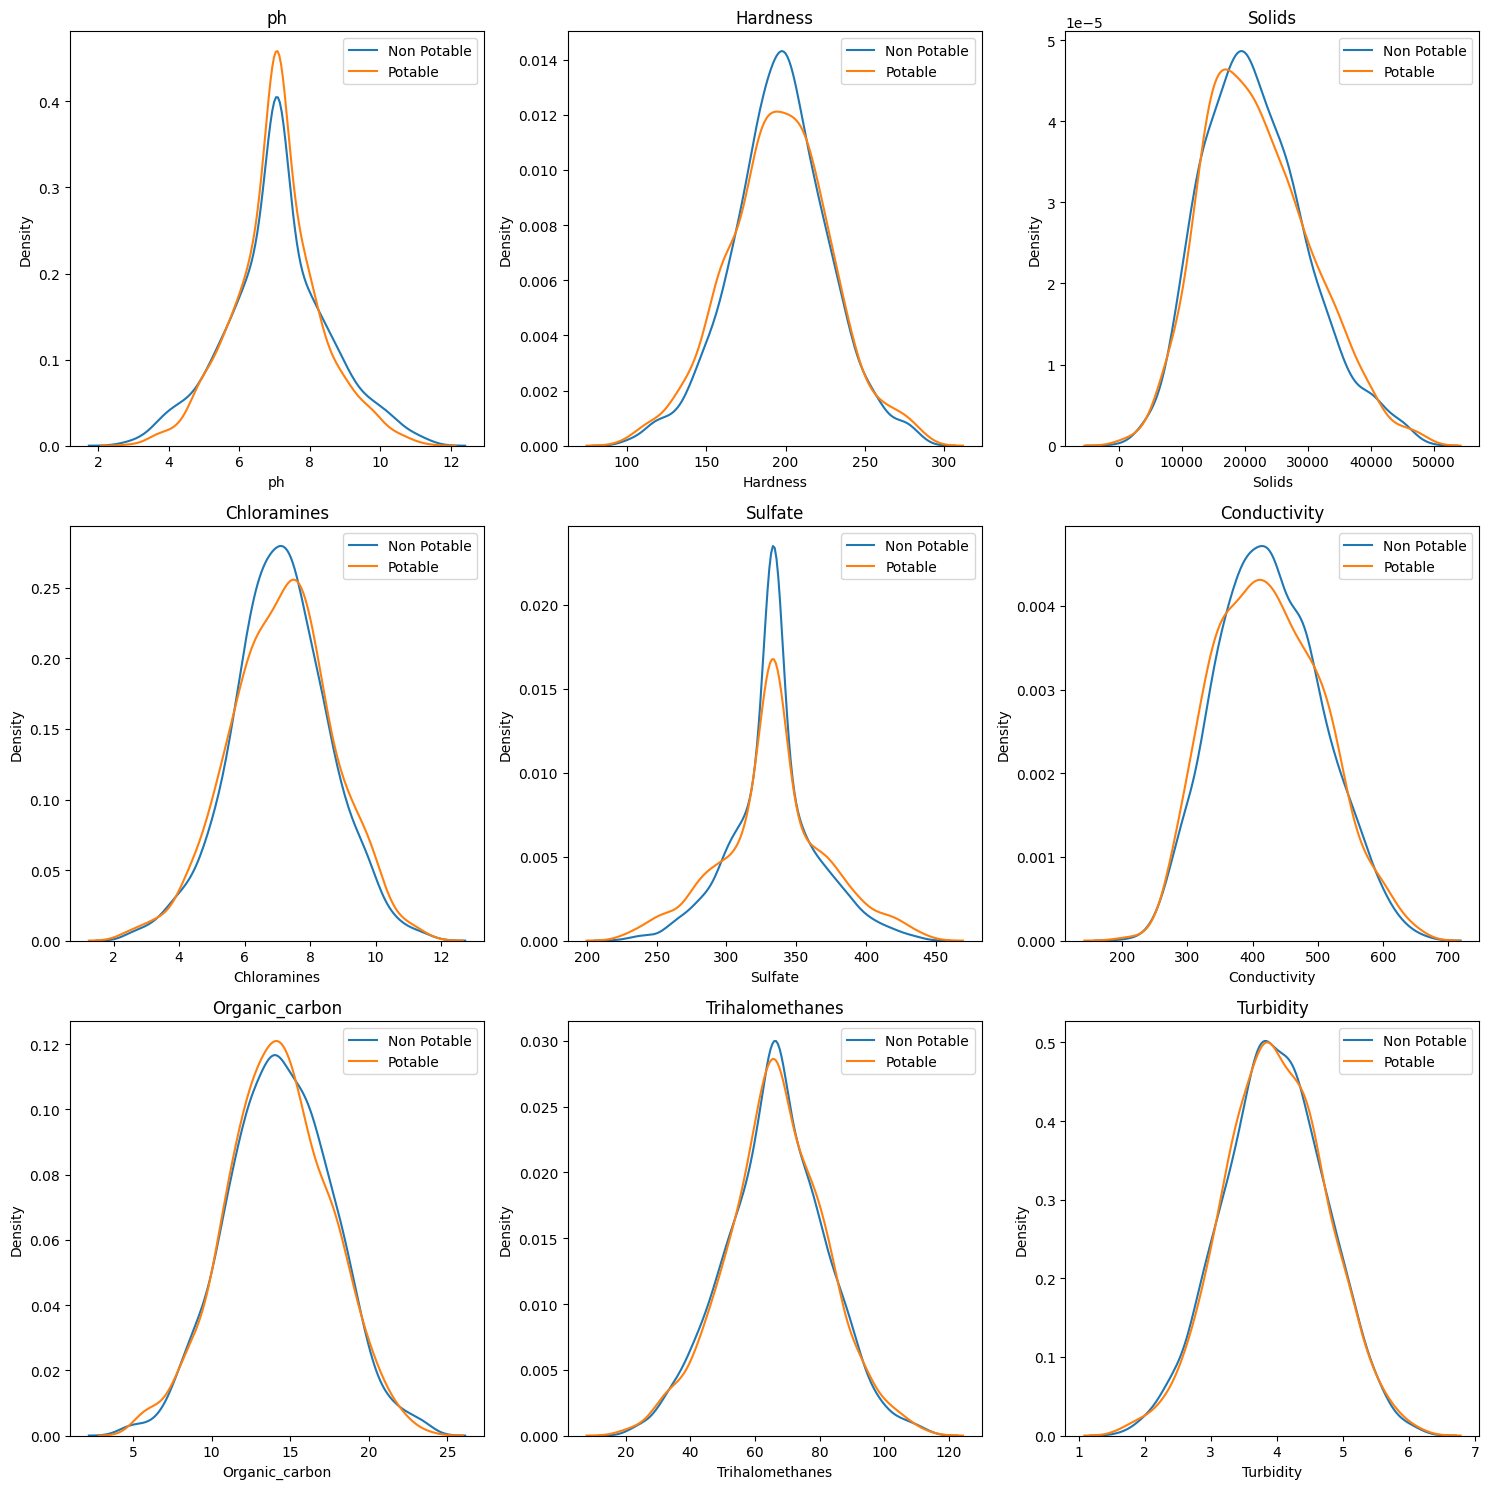

In [174]:
non_potable = data_clean.query("Potability == 0")
potable = data_clean.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(data1.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

In [175]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3128 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3128 non-null   float64
 1   Hardness         3128 non-null   float64
 2   Solids           3128 non-null   float64
 3   Chloramines      3128 non-null   float64
 4   Sulfate          3128 non-null   float64
 5   Conductivity     3128 non-null   float64
 6   Organic_carbon   3128 non-null   float64
 7   Trihalomethanes  3128 non-null   float64
 8   Turbidity        3128 non-null   float64
 9   Potability       3128 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 268.8 KB


In [176]:
data_clean.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [177]:
from pandas_profiling import ProfileReport

In [178]:
cor = data_clean[["ph",'Hardness','Solids' , 'Chloramines','Sulfate','Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']].corr()
cor

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.119413,-0.079392,-0.056149,0.006954,0.024263,0.032580,0.005572,-0.035242,-0.005952
Hardness,0.119413,1.000000,-0.042096,-0.023253,-0.067974,-0.029915,0.001085,-0.013553,-0.014911,-0.011640
Solids,-0.079392,-0.042096,1.000000,-0.062750,-0.130113,0.006589,0.016485,-0.022350,0.017667,0.020848
Chloramines,-0.056149,-0.023253,-0.062750,1.000000,0.028848,-0.025852,-0.010827,0.018391,0.010489,0.015409
Sulfate,0.006954,-0.067974,-0.130113,0.028848,1.000000,-0.007489,0.019095,-0.023573,-0.000281,-0.004252
Conductivity,0.024263,-0.029915,0.006589,-0.025852,-0.007489,1.000000,0.017965,0.002875,-0.000559,-0.007554
Organic_carbon,0.032580,0.001085,0.016485,-0.010827,0.019095,0.017965,1.000000,-0.020577,-0.022832,-0.018693
Trihalomethanes,0.005572,-0.013553,-0.022350,0.018391,-0.023573,0.002875,-0.020577,1.000000,-0.019975,0.007374
Turbidity,-0.035242,-0.014911,0.017667,0.010489,-0.000281,-0.000559,-0.022832,-0.019975,1.000000,0.003852
Potability,-0.005952,-0.011640,0.020848,0.015409,-0.004252,-0.007554,-0.018693,0.007374,0.003852,1.000000


<Axes: >

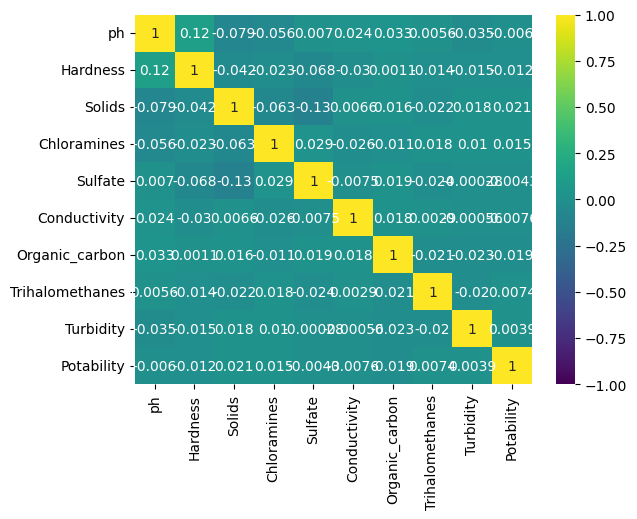

In [179]:
sns.heatmap(cor, annot=True,cmap= "viridis", vmin=-1,vmax=1) 

In [180]:
target_correlation = data_clean.corr()['Potability'].sort_values(ascending=False)
target_correlation

Potability         1.000000
Solids             0.020848
Chloramines        0.015409
Trihalomethanes    0.007374
Turbidity          0.003852
Sulfate           -0.004252
ph                -0.005952
Conductivity      -0.007554
Hardness          -0.011640
Organic_carbon    -0.018693
Name: Potability, dtype: float64

In [181]:
data_clean.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [182]:
threshold = 0.01
columns = target_correlation[abs(target_correlation)<=threshold].index
data_clean.drop(columns=columns)

,Hardness,Solids,Chloramines,Organic_carbon,Potability
0,204.890455,20791.318981,7.300212,10.379783,0
1,129.422921,18630.057858,6.635246,15.180013,0
2,224.236259,19909.541732,9.275884,16.868637,0
3,214.373394,22018.417441,8.059332,18.436524,0
4,181.101509,17978.986339,6.546600,11.558279,0
...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,13.894419,1
3272,193.553212,17329.802160,8.061362,19.903225,1
3273,175.762646,33155.578218,7.350233,11.039070,1
3274,230.603758,11983.869376,6.303357,11.168946,1


In [183]:
data_clean

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


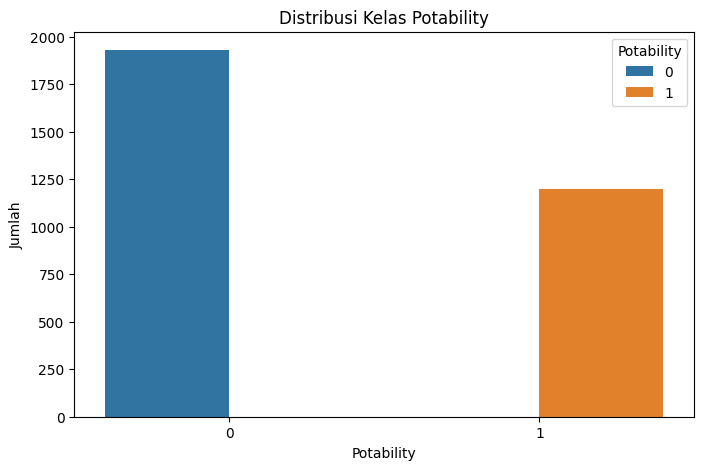

In [184]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data_clean, x='Potability', hue='Potability')
plt.title('Distribusi Kelas Potability')
plt.xlabel('Potability')
plt.ylabel('Jumlah')
plt.show()

In [185]:
# Assuming your target column is named 'target'
X = data_clean.drop('Potability', axis=1) #feature untuk dimasukkan ke model semua variabel selain potability
y = data_clean['Potability'] # target(variabel potability)

In [186]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [187]:
data_scaler= StandardScaler()
X_scaled= data_scaler.fit_transform(X)
X= pd.DataFrame(X_scaled,columns=X.columns)

In [188]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000083,0.272096,-0.119300,0.126361,1.022045,1.724599,-1.193626,1.334409,-1.303347
1,-2.456445,-2.120675,-0.377879,-0.312511,-0.010366,2.080501,0.267907,-0.655287,0.697890
2,0.743550,0.885473,-0.224798,1.430286,-0.010366,-0.090019,0.782045,-0.000466,-1.182561
3,0.902447,0.572761,0.027514,0.627374,0.676419,-0.779235,1.259422,2.200757,0.864644
4,1.468597,-0.482156,-0.455776,-0.371016,-0.712892,-0.341538,-0.834808,-2.234168,0.143954
...,...,...,...,...,...,...,...,...,...
3123,-1.761388,-0.083287,3.085896,0.038204,0.767428,1.252775,-0.123520,0.016899,0.613501
3124,0.531629,-0.087362,-0.533446,0.628713,-0.010366,-0.415781,1.705990,-0.002010,-1.517971
3125,1.707544,-0.651429,1.359997,0.159374,-0.010366,0.077348,-0.992892,0.221808,-0.866348
3126,-1.426527,1.087361,-1.173049,-0.531555,-0.010366,-0.285839,-0.953348,0.717761,0.968626


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import set_config
from sklearn.compose import ColumnTransformer
set_config(display="diagram")

In [192]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3128 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3128 non-null   float64
 1   Hardness         3128 non-null   float64
 2   Solids           3128 non-null   float64
 3   Chloramines      3128 non-null   float64
 4   Sulfate          3128 non-null   float64
 5   Conductivity     3128 non-null   float64
 6   Organic_carbon   3128 non-null   float64
 7   Trihalomethanes  3128 non-null   float64
 8   Turbidity        3128 non-null   float64
 9   Potability       3128 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 268.8 KB


In [193]:
SEED = 42
TARGET = 'Potability'
FEATURES = data_clean.columns.drop(TARGET)

NUMERICAL = data_clean[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")


Numerical features: ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity


In [194]:
# Memisahkan fitur (features) dan label (target) dari DataFrame
X = data_clean[FEATURES]  # Fitur
y = data_clean[TARGET]  # Target

# Inisialisasi SMOTE dengan SEED = 42
smote = RandomUnderSampler(random_state=SEED)

# Melakukan oversampling menggunakan SMOTE pada fitur dan target
X_resampled, y_resampled = smote.fit_resample(X, y)

In [195]:
NUMERICAL= ['Hardness', 'Solids','Chloramines', 'Organic_carbon']

In [196]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3128 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hardness        3128 non-null   float64
 1   Solids          3128 non-null   float64
 2   Chloramines     3128 non-null   float64
 3   Organic_carbon  3128 non-null   float64
 4   Potability      3128 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 146.6 KB


In [197]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Definisikan langkah-langkah preprocessing
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
])

# Buat pipeline dengan menggunakan SMOTE dari imblearn
model = DecisionTreeClassifier()
pipeline = ImbPipeline([
    ('preprocessors', preprocessors),
    ('smote', RandomUnderSampler(random_state=42)),  # Tambahkan SMOTE sebagai langkah dalam ImbPipeline
    ('model', model)
])

# Fit pipeline dengan data training yang sudah di-oversample menggunakan SMOTE
pipeline.fit(X_resampled, y_resampled)


Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Hardness', 'Solids',
                                                   'Chloramines',
                                                   'Organic_carbon'])])),
                ('smote', RandomUnderSampler(random_state=42)),
                ('model', DecisionTreeClassifier())])

In [198]:
from sklearn.metrics import roc_auc_score

# Prediksi train dan test set
y_train_pred = pipeline.predict_proba(X_train)[:, 1]
y_test_pred = pipeline.predict_proba(X_test)[:, 1]

# Menghitung ROC-AUC untuk train dan test set
train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"Train ROC-AUC: {train_roc_auc:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")


Train ROC-AUC: 0.5000
Test ROC-AUC: 0.5000


In [199]:
from sklearn.metrics import classification_report

# Lakukan prediksi pada data uji menggunakan pipeline yang sudah difit
y_pred = pipeline.predict(X_test)

# Tampilkan evaluasi model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       394
           1       0.00      0.00      0.00       232

    accuracy                           0.63       626
   macro avg       0.31      0.50      0.39       626
weighted avg       0.40      0.63      0.49       626



c:\Users\Noviana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Noviana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Noviana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

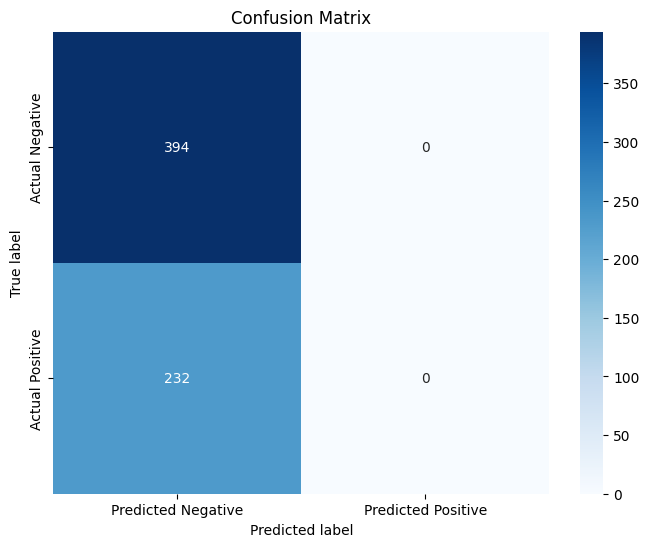

In [200]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [201]:
y_pred = pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)


confusion_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'],
                            index=['Actual Negative', 'Actual Positive'])

print("Confusion Matrix:")
print(confusion_df)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 394                   0
Actual Positive                 232                   0


In [205]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold  # Menggunakan StratifiedKFold untuk dataset yang tidak seimbang

# Definisikan Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # Ubah jumlah lipatan (n_splits) sesuai kebutuhan

# Lakukan cross-validation
scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=cv, scoring='accuracy')  # Ubah scoring sesuai metrik yang diinginkan

# Tampilkan hasil cross-validation
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Accuracy scores: [0.4625     0.5625     0.52916667 0.53333333 0.55       0.475
 0.52719665 0.49790795 0.48535565 0.51464435]
Mean accuracy: 0.513760460251046
